<a href="https://colab.research.google.com/github/javeed1209/Machine-Learning/blob/main/gold_price_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [20]:
!pip install opendatasets

In [21]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/altruistdelhite04/gold-price-data")

Skipping, found downloaded files in "./gold-price-data" (use force=True to force download)


In [22]:
gold_data = pd.read_csv("/content/gold-price-data/gld_price_data.csv")

gold_data.head()


,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [23]:
gold_data.shape

(2290, 6)

In [24]:
gold_data.isnull().sum()

,0
Date,0
SPX,0
GLD,0
USO,0
SLV,0
EUR/USD,0


In [25]:
gold_data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [26]:
print(gold_data.dtypes)


Date        object
SPX        float64
GLD        float64
USO        float64
SLV        float64
EUR/USD    float64
dtype: object


In [27]:
gold_data['Date'] = pd.to_datetime(gold_data['Date'])

In [28]:
correlation = gold_data.corr()

<Axes: >

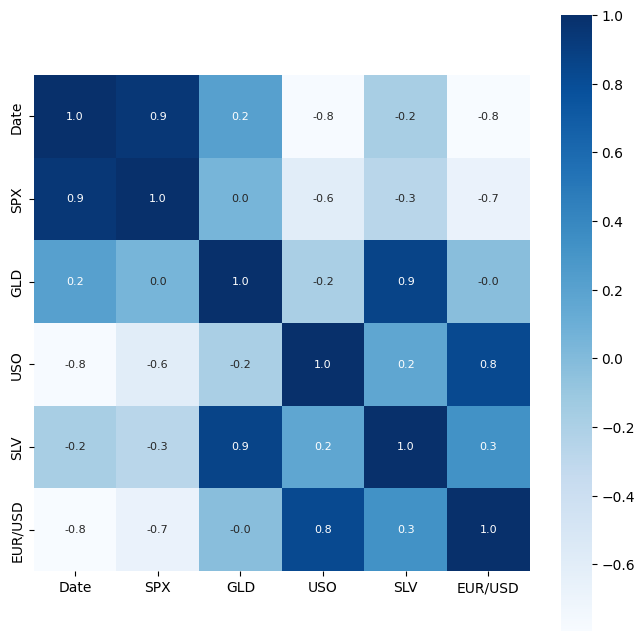

In [29]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True, square=True,fmt='.1f',annot = True, annot_kws ={'size':8},cmap='Blues')

In [30]:
print(correlation['GLD'])

Date       0.209118
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


/tmp/ipython-input-2492781838.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(gold_data['GLD'],color = 'green')


<Axes: xlabel='GLD', ylabel='Density'>

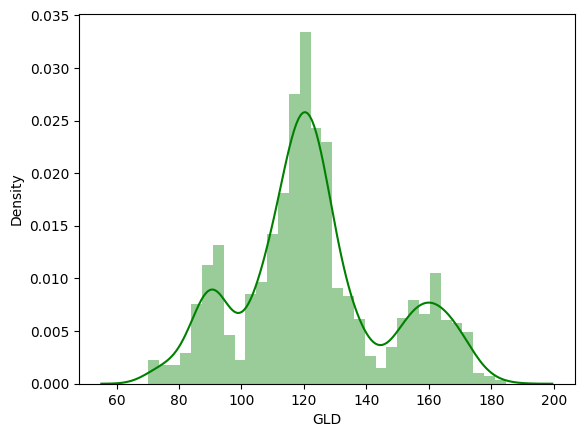

In [31]:
sns.distplot(gold_data['GLD'],color = 'green')

In [32]:
#remove date column and separatin gold column
X = gold_data.drop(['Date','GLD'],axis=1)
Y = gold_data['GLD']

In [33]:
print(X)
print(Y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [34]:
#testing and training
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 2)

In [35]:
regressor = RandomForestRegressor(n_estimators=100)

In [36]:
regressor.fit(X_train,Y_train)

RandomForestRegressor()

In [37]:
#evaluation
test_data_prediction = regressor.predict(X_test)

In [38]:
print(test_data_prediction)

[168.23329956  81.93330006 116.08350027 127.56130065 120.54310189
 154.76099773 150.29139917 126.19210046 117.58269903 125.93240109
 116.62100149 171.64790115 140.78829823 167.64439844 115.30570023
 117.76380066 138.56420272 169.97980107 158.90210302 159.30599848
 155.11090036 125.10120057 176.78589974 157.3745035  125.26770074
  93.80119969  77.01000015 120.58800059 119.15659966 167.45349989
  88.04890039 125.17039969  91.07740075 117.67809988 120.92839904
 136.3592008  115.43070127 115.01380077 148.37850001 107.56540102
 104.37310213  87.10279791 126.54170012 117.92310043 153.1078991
 119.66970002 108.33989998 108.07539851  93.31390061 126.97189827
  74.47540055 113.6505996  121.31029993 111.38699929 118.94859902
 120.24059957 159.06969981 166.28370145 146.90479674  85.55079851
  94.45590009  86.77949911  90.57360013 118.92480076 126.47150091
 127.49480044 169.50079979 122.22479895 117.39059922  98.58140072
 168.60080172 143.14439854 132.48450211 121.2363019  121.23789963
 119.595500

In [39]:
error_score = metrics.r2_score(Y_test,test_data_prediction)
print(error_score)

0.9891701956271405
